<a href="https://colab.research.google.com/github/Shriniwas18K/Mini-Projects/blob/main/computer%20vision%20and%20deep%20learning%20/Image_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### gaussian adaptive thresholding

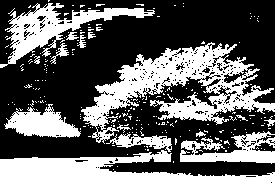

In [ ]:
from google.colab.patches import cv2_imshow
import cv2

img = cv2.imread('image.jpeg')
# Convert the image to grayscale
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# Apply adaptive thresholding to the grayscale image
thresh_img = cv2.adaptiveThreshold(gray_img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                   cv2.THRESH_BINARY, 115, 1)
cv2_imshow(thresh_img) # Display the thresholded image

### Otsu thresholding

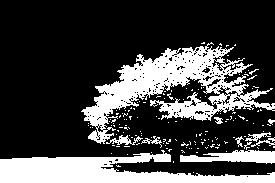

In [ ]:
# Apply Otsu's thresholding
ret, thresh_img = cv2.threshold(gray_img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
cv2_imshow(thresh_img)

### region growing

<ipython-input-29-eeb1faca436c>:38: RuntimeWarning: overflow encountered in scalar subtract
  abs(img[neighbor_row, neighbor_col] - img[seed_point]) < threshold): # Adjust the threshold as needed


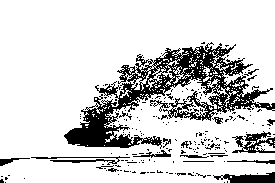

In [ ]:
import numpy as np

def region_growing(img, seed_point,threshold):
  """
  Performs region growing segmentation on an image.

  Args:
    img: The input image (grayscale).
    seed_point: The starting point for the region growing (tuple of (row, col)).
    threshold: The threshold value for determining the region.

  Returns:
    A binary image where the segmented region is marked as 1 and the rest is 0.
  """

  rows, cols = img.shape
  segmented = np.zeros_like(img, dtype=np.uint8)
  visited = np.zeros_like(img, dtype=np.uint8)

  queue = [seed_point]
  visited[seed_point] = 1

  while queue:
    current_point = queue.pop(0)
    row, col = current_point
    segmented[row, col] = 255

    neighbors = [(row - 1, col), (row + 1, col), (row, col - 1), (row, col + 1),
                 (row - 1, col - 1), (row - 1, col + 1), (row + 1, col - 1), (row + 1, col + 1),
                 (row - 2, col), (row + 2, col), (row, col - 2), (row, col + 2),
                 (row - 2, col - 2), (row - 2, col + 2), (row + 2, col - 2), (row + 2, col + 2)]

    for neighbor_row, neighbor_col in neighbors:
      if (0 <= neighbor_row < rows and 0 <= neighbor_col < cols and
          visited[neighbor_row, neighbor_col] == 0 and
          abs(img[neighbor_row, neighbor_col] - img[seed_point]) < threshold): # Adjust the threshold as needed
        queue.append((neighbor_row, neighbor_col))
        visited[neighbor_row, neighbor_col] = 1

  return segmented

# Example usage:
seed_point = (100, 100)  # Replace with your desired seed point
threshold=170
segmented_image = region_growing(gray_img, seed_point,threshold)
cv2_imshow(segmented_image)